<a href="https://colab.research.google.com/github/M0n1ka-05/Rossmann_Sale_Prediction/blob/main/Monika_Shinde_Team_4_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### **What is Sale Forecasting(prediction)?**

Sales forecasting is the process of estimating future sales. Accurate sales forecasts enable companies to make informed business decisions and predict short-term and long-term performance. Companies can base their forecasts on past sales data, industry-wide comparisons, and economic trends.

It is easier for established companies to predict future sales based on years of past business data.Sales forecasting gives insight into how a company should manage its workforce, cash flow, and resources. In addition to helping a company allocate its internal resources effectively, predictive sales data is important for businesses when looking to acquire investment capital.

Sales forecasting allows companies to:

*   Predict achievable sales revenue;
*   Efficiently allocate resources;
*   Plan for future growth.




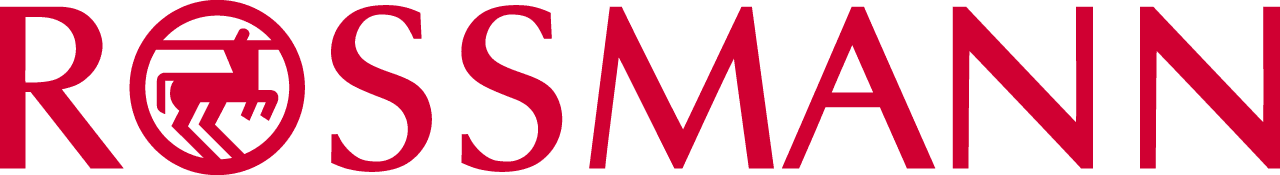

So, lets get started. Our major task as part of this project is to predict sales, for **Rossmann**. 

In this project we will analyse how various affect the sales for various stores.

Few points which we try to elaborate, in our project further:


1.   We have null values which need to handled.
2.   Dataset is too big, sampling is required.
3.   There are few stored where sales is 0, even though stores are open, so need to check what is reason for that, and how to bring business there, if any changes required, or we can ignore it.
4.   We have columns for Promo2 , most of stores having null value there, so need to check if promo 2 affecting sales , and how much it is affecting.

In [102]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
file1 = ('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/dat/Rossmann Stores Data.csv')
file2 = ('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/dat/store.csv')

In [220]:
sales_df = pd.read_csv(file1)
store_df = pd.read_csv(file2)

Let's see how our data looks like, and what all features we are having.



In [221]:
sales_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [222]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


Look's cool. Now lets check how many values are null. 

Null or missing values, can have huge impact on our model. So it's important to handle them before hand.

In [223]:
sales_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [224]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Sales dataframe looks perfect, but store dataframe is having missing values.

In [225]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [226]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [227]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [228]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## **Exploratory Data Analysis**

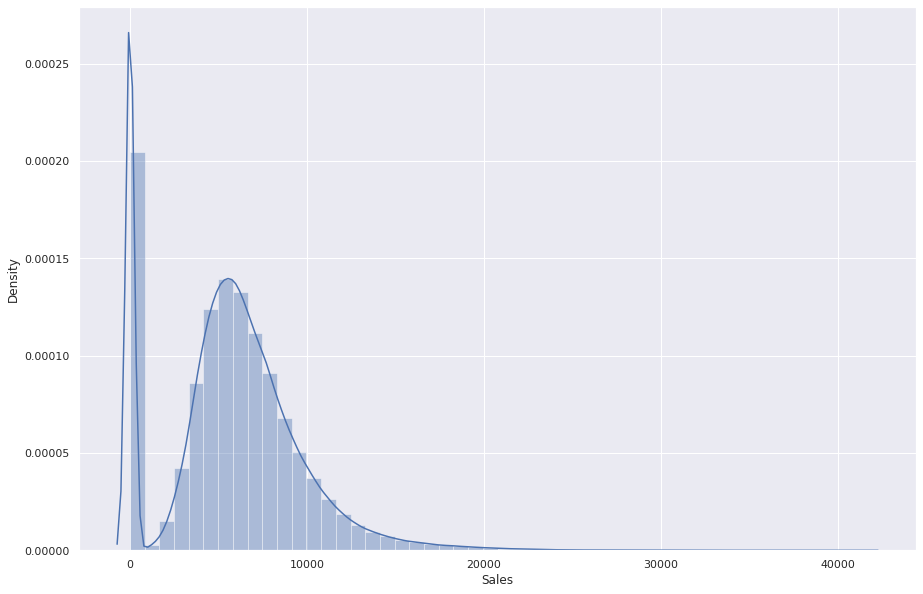

In [229]:
plt.subplots(figsize=(15,10))
sns.distplot(sales_df['Sales'])

The above graph shows that there are many records having sales  = 0. 

In [230]:
sales_df[sales_df['Sales'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [231]:
#No of stores which are open/close
Closed_stores = sales_df[sales_df['Open'] == 0].value_counts().sum()
Open_stores = sales_df[sales_df['Open'] == 1].value_counts().sum()

print(f'No. of Open stores: {Open_stores}')
print(f'No. of Closed stores: {Closed_stores}')


No. of Open stores: 844392
No. of Closed stores: 172817


As we know that there are closed stores, we can simply remove them from our dataset. Once we did that , we dont need **OPEN** column anymore . So we can drop it.

In [232]:
sales_df = sales_df[sales_df['Open'] == 1]

In [233]:
sales_df.drop('Open', axis=1, inplace=True);

In [234]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


checking again if we have rows with sales = 0. And yes  we have 54 rows. But we can take it as may be it is possibilities that store is open but no customer went there.

In [235]:
sales_df[sales_df['Sales'] == 0].value_counts().sum()

54

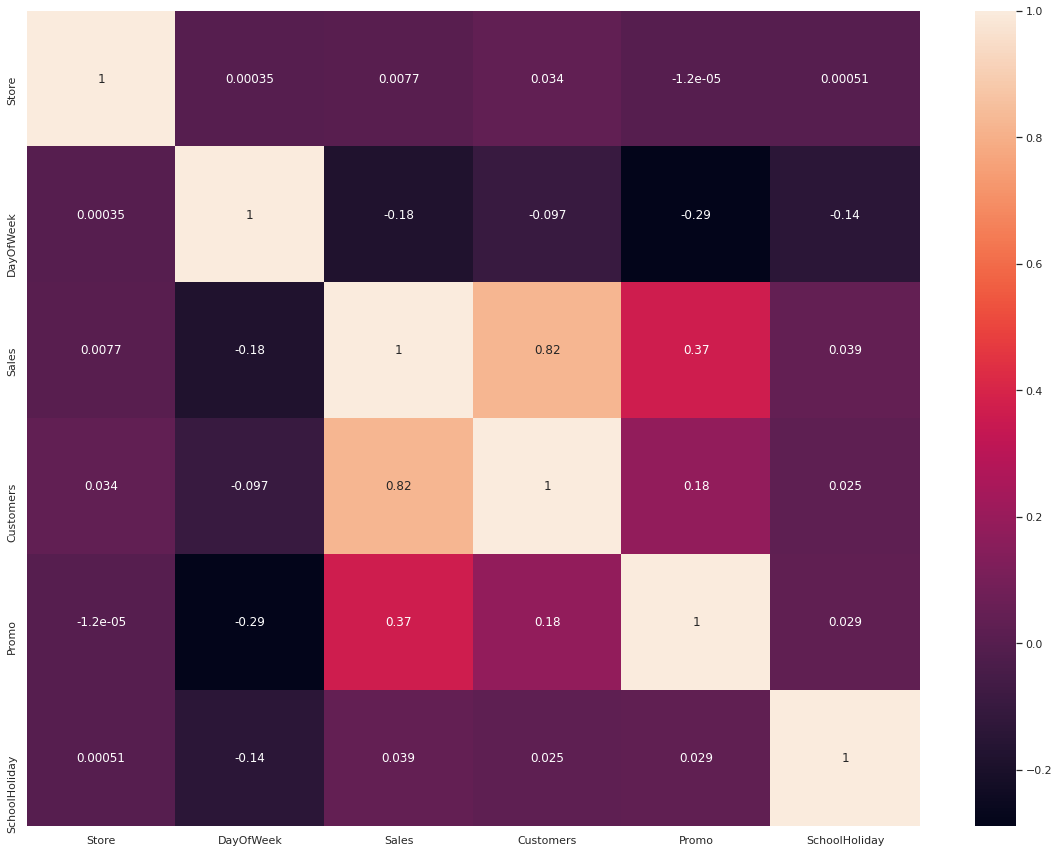

In [236]:
plt.subplots(figsize=(20,15))
sns.heatmap(sales_df.corr(), annot = True)

We can see sales and customer are highly co related, and its obvious too. Lets analyse customer column now.

In [237]:
sales_df['Customers'].value_counts()

560     2414
576     2363
603     2337
571     2330
555     2328
        ... 
4016       1
3420       1
4245       1
3733       1
3845       1
Name: Customers, Length: 4086, dtype: int64

In [238]:
sales_df[sales_df['Customers'] == 0].value_counts().sum()

52

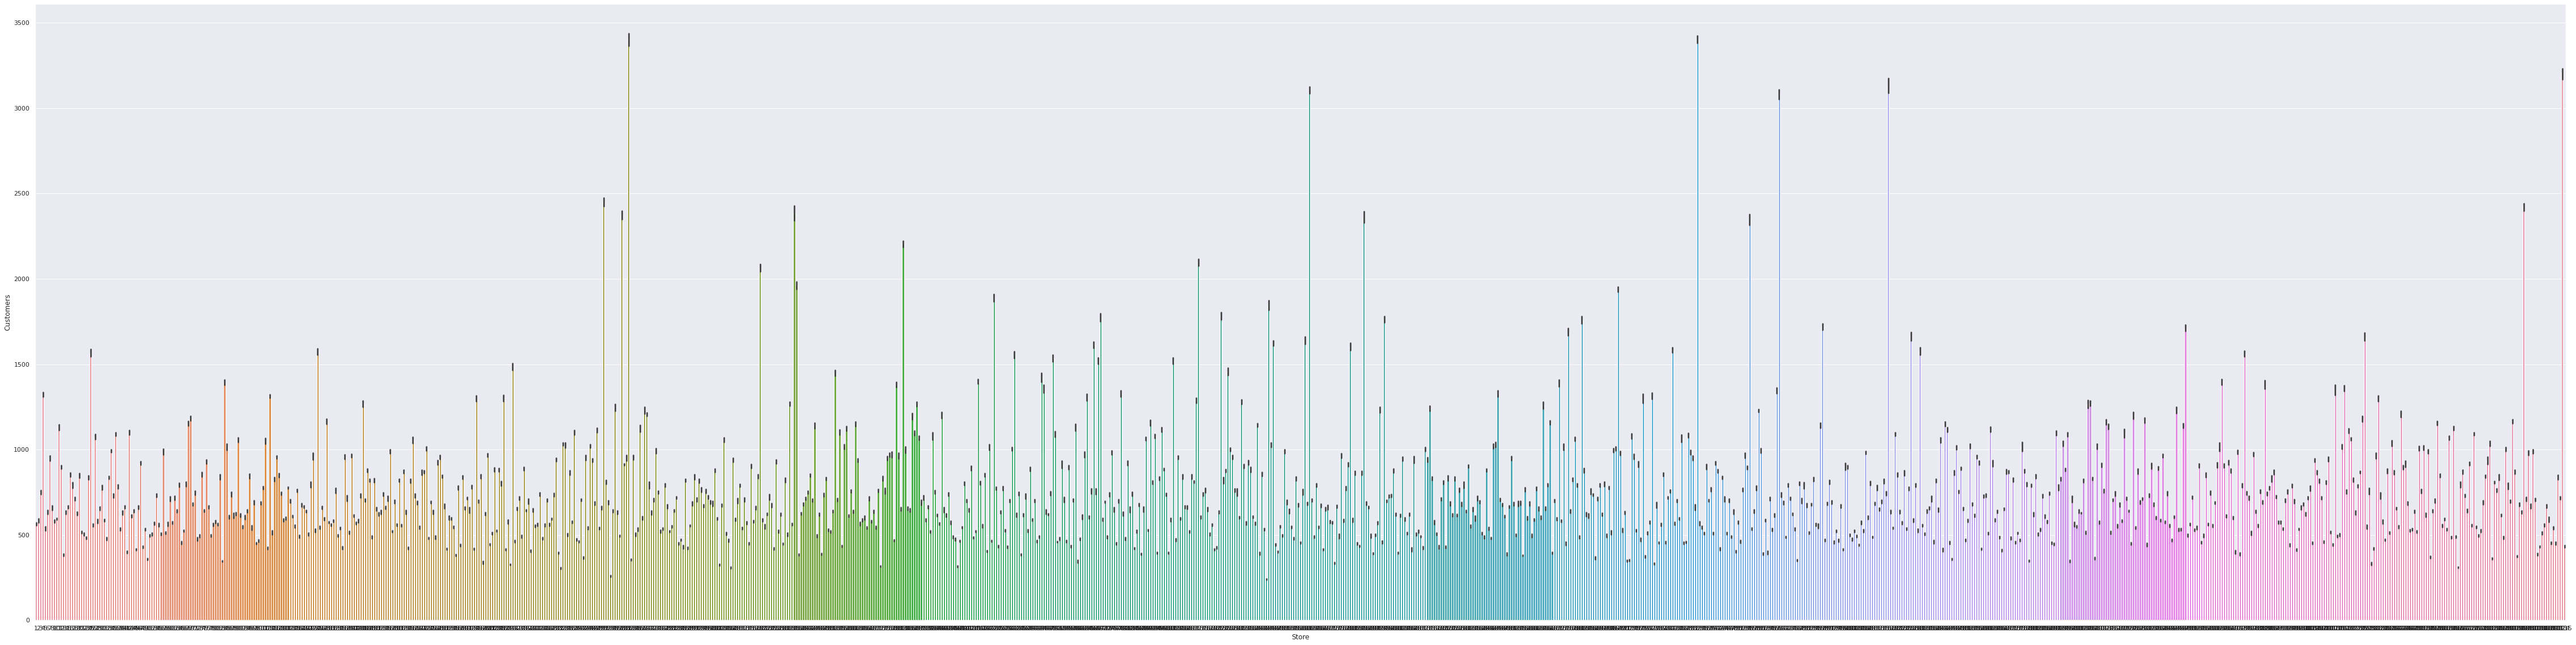

In [239]:
plt.subplots(figsize=(80,20))
sns.barplot(x='Store', y='Customers', data = sales_df)

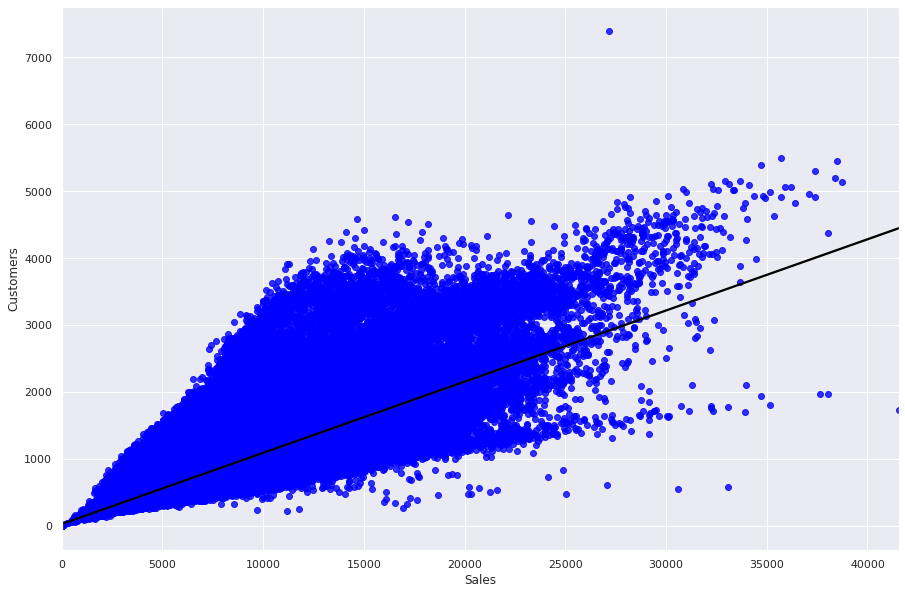

In [240]:
# How customers affect sales
sns.regplot(x=sales_df['Sales'], y=sales_df['Customers'],scatter_kws={"color": "blue"}, line_kws={"color": "black"})

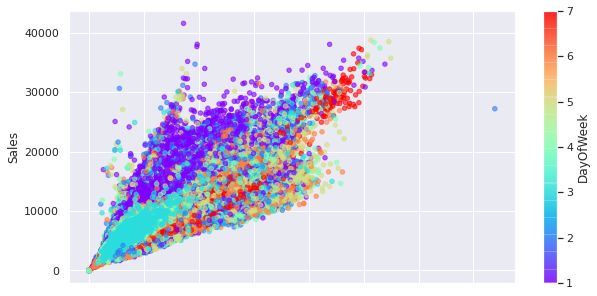

In [241]:
sales_df.plot.scatter('Customers','Sales',s=20,c='DayOfWeek',cmap='rainbow',figsize=(10,5),alpha=0.6)

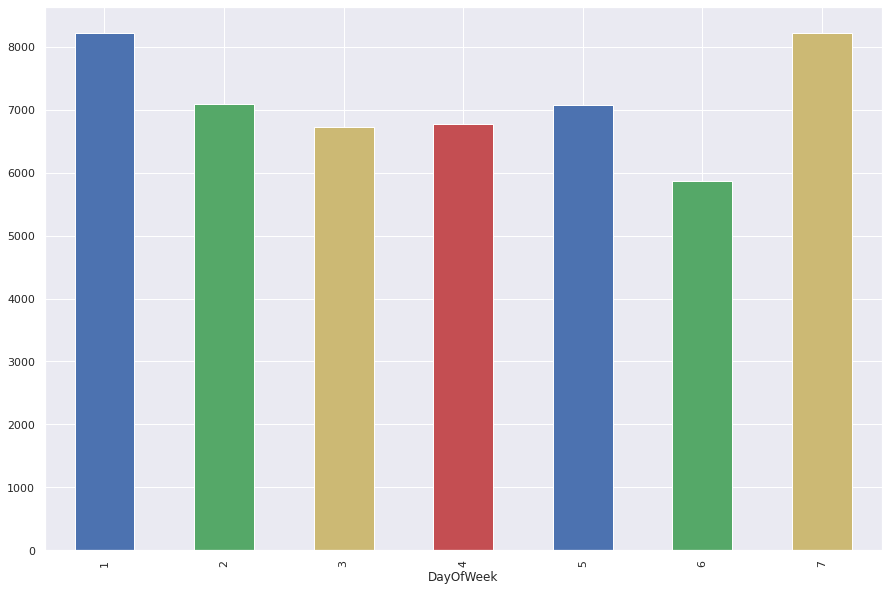

In [242]:
sales_df.groupby('DayOfWeek').agg({'Sales':np.mean}).plot(kind='bar',color='bgyr',legend=[])


In [243]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


For all those records where Promo2 is 0 , we will not have records for Promo2SinceWeek, Promo2SinceYear	and PromoInterval. So we can replace Nan value using 0.

In [244]:
store_df[store_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [245]:
# Replacing Nan with 0 in below cols.
store_df.update(store_df[['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']].fillna(0))

In [246]:
store_df[store_df['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,0.0,0.0,0
621,622,a,c,NaN,NaN,NaN,0,0.0,0.0,0
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


From above frame, we have 3 rows where Competetion Distance  is NaN. We can assume that there is no competetor for this 3 stores and we can replace it using 0

In [247]:
store_df[store_df['CompetitionDistance'].isna()].fillna(0)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,0.0,0.0,0.0,0,0.0,0.0,0
621,622,a,c,0.0,0.0,0.0,0,0.0,0.0,0
878,879,d,a,0.0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [248]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

For Month and year can not use mean or mode as there are many missing values. So will try different methods like ffill and backfill to not get same values for all those missing.

In [249]:
store_df.fillna(method='ffill', limit = 2, inplace = True)

In [250]:
# Filling rest values using backfill.
store_df.fillna(method='backfill', inplace = True)

In [251]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    1
CompetitionOpenSinceYear     1
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [252]:
store_df['CompetitionOpenSinceMonth'].median()

7.0

In [253]:
# 1 value was not filled
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].median())

# 1 value was not filled. So done manually
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].median())


In [254]:
store_df.head(4)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0


combining both dataset, and will perform reamining operations on combined one.

In [255]:
final_df = pd.merge(sales_df, store_df, how='inner', on='Store')

In [256]:
final_df.shape

(844392, 17)

In [257]:
final_df.head(4)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


Now we have date column too , lets modify that:

In [258]:
#lets split date in days, moth and year
final_df['Year'] = pd.DatetimeIndex(final_df['Date']).year
final_df['Month'] = pd.DatetimeIndex(final_df['Date']).month
final_df['Day'] = pd.DatetimeIndex(final_df['Date']).day

In [259]:
final_df.drop('Date', inplace=True, axis=1)

In [260]:
sns.set(rc={'figure.figsize':(15,10)})

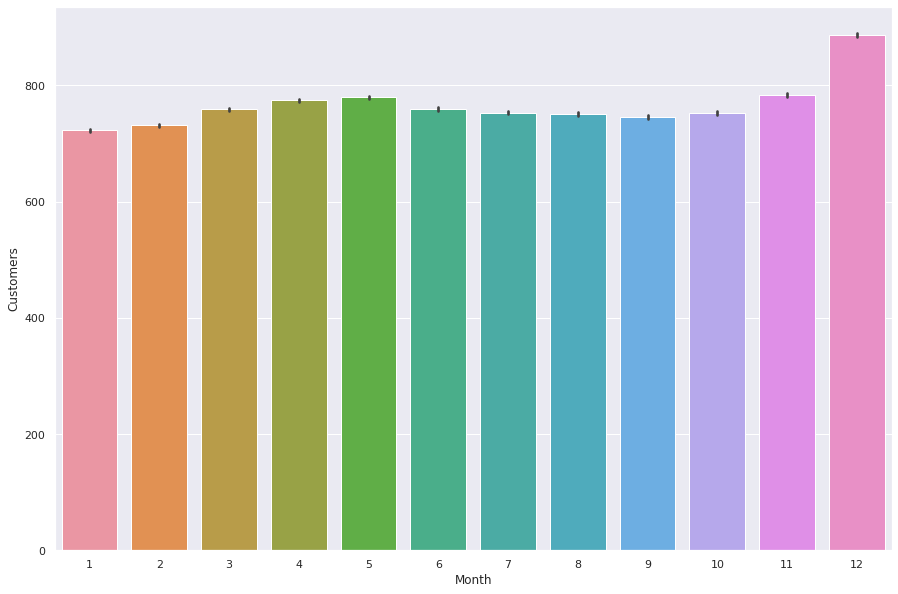

In [261]:
sns.barplot(x='Month', y='Customers', data=final_df)

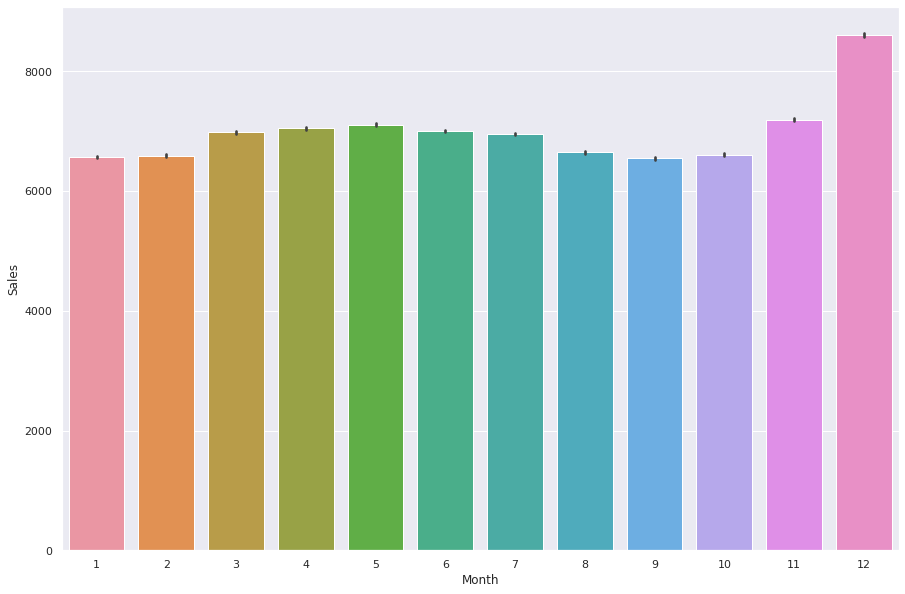

In [262]:
sns.barplot(x='Month', y='Sales', data=final_df)

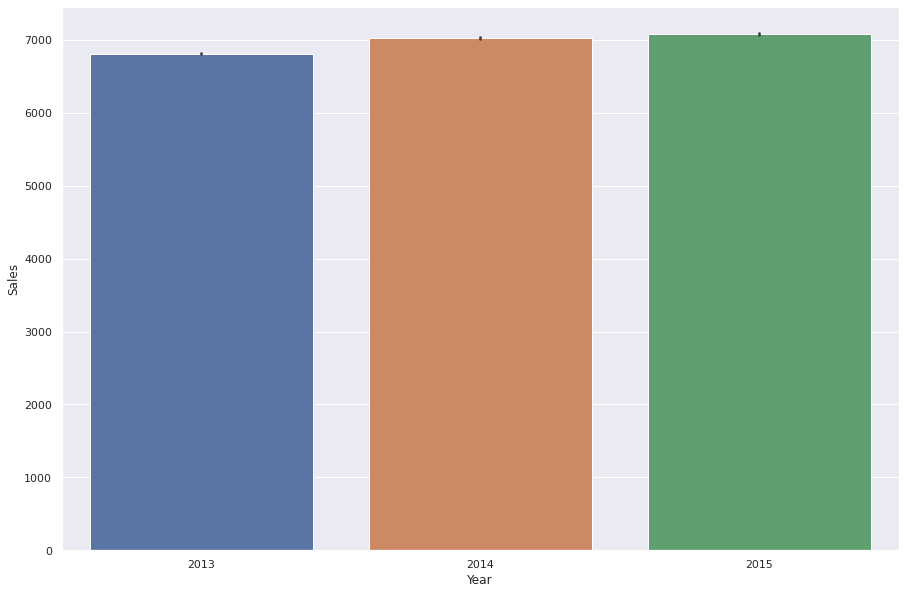

In [263]:
sns.barplot(x='Year', y='Sales', data=final_df)

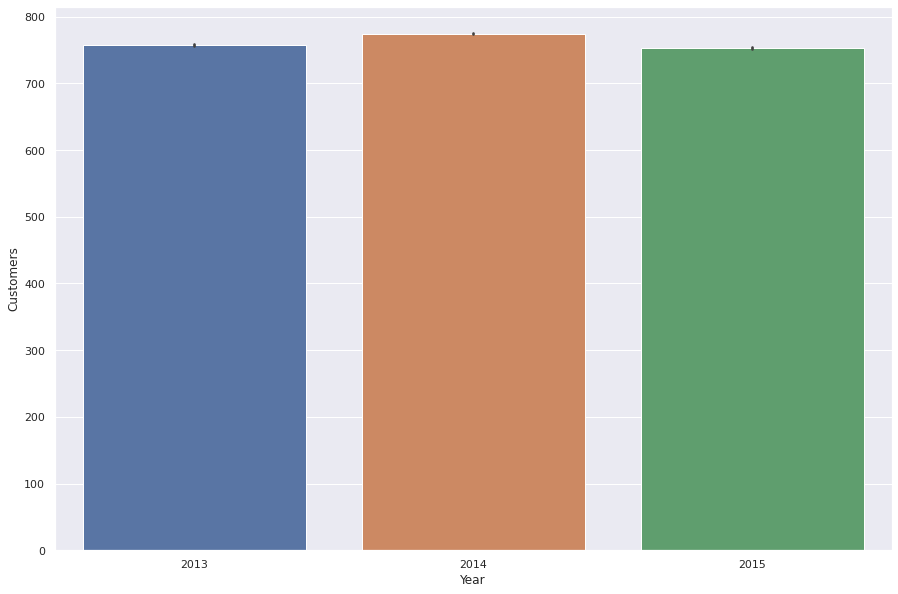

In [264]:
sns.barplot(x='Year', y='Customers', data=final_df)

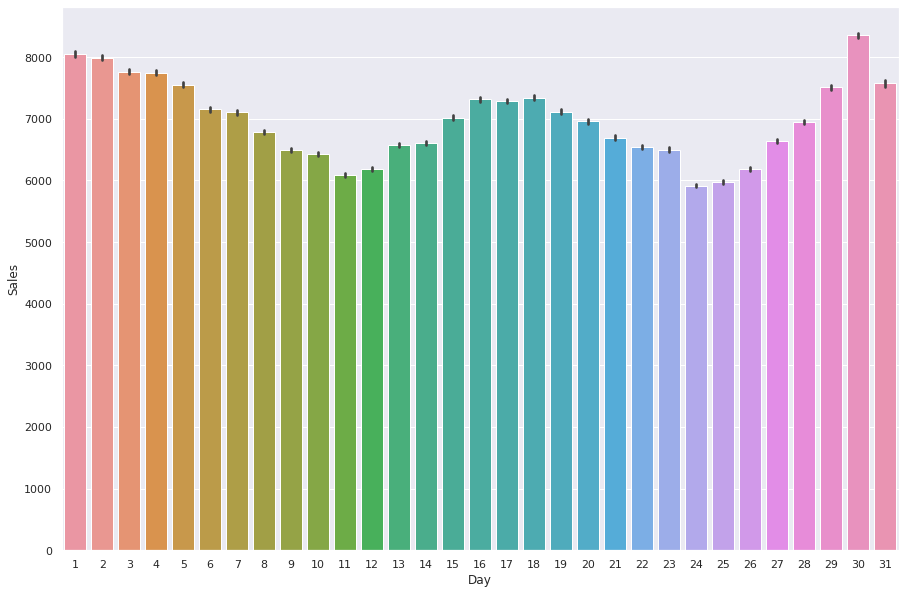

In [265]:
sns.barplot(x='Day', y='Sales', data=final_df)

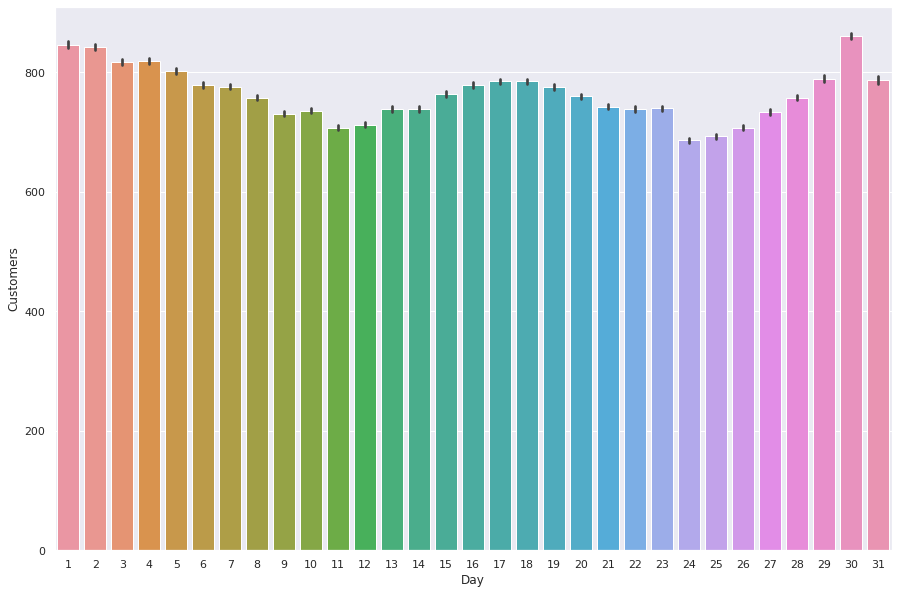

In [266]:
sns.barplot(x='Day', y='Customers', data=final_df)

Lets check if PROMO and PROMO2 have impact on sales

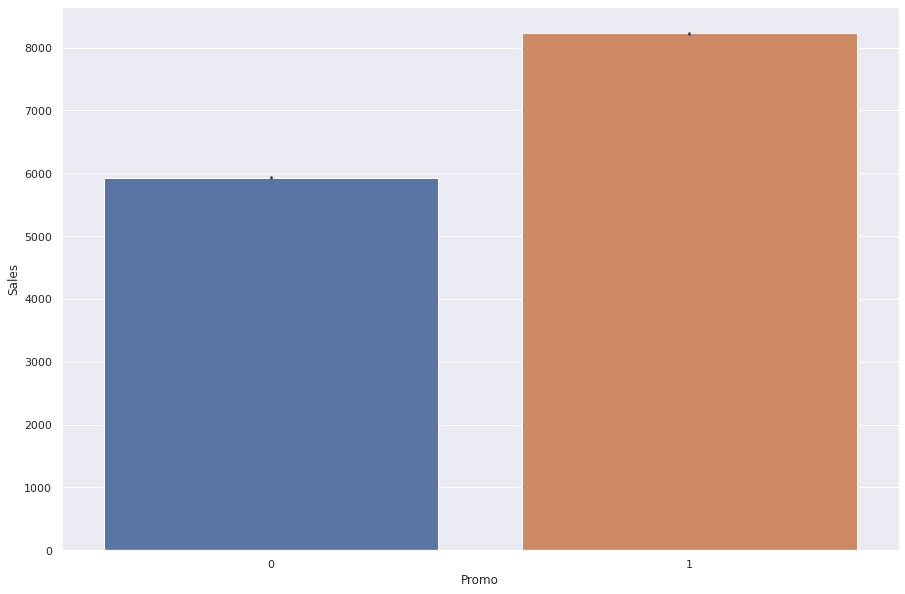

In [267]:
sns.barplot(x='Promo', y='Sales', data=final_df)

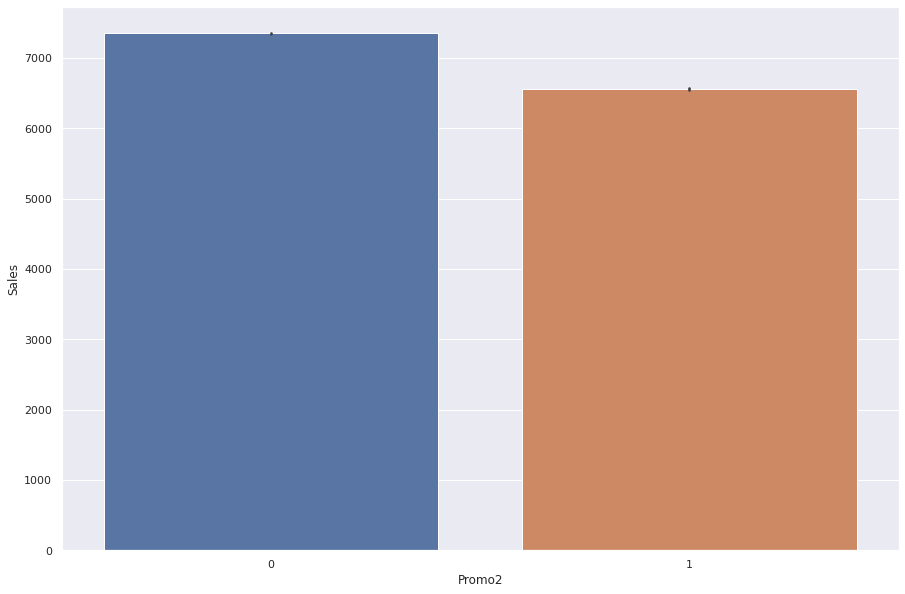

In [268]:
sns.barplot(x='Promo2', y='Sales', data=final_df)

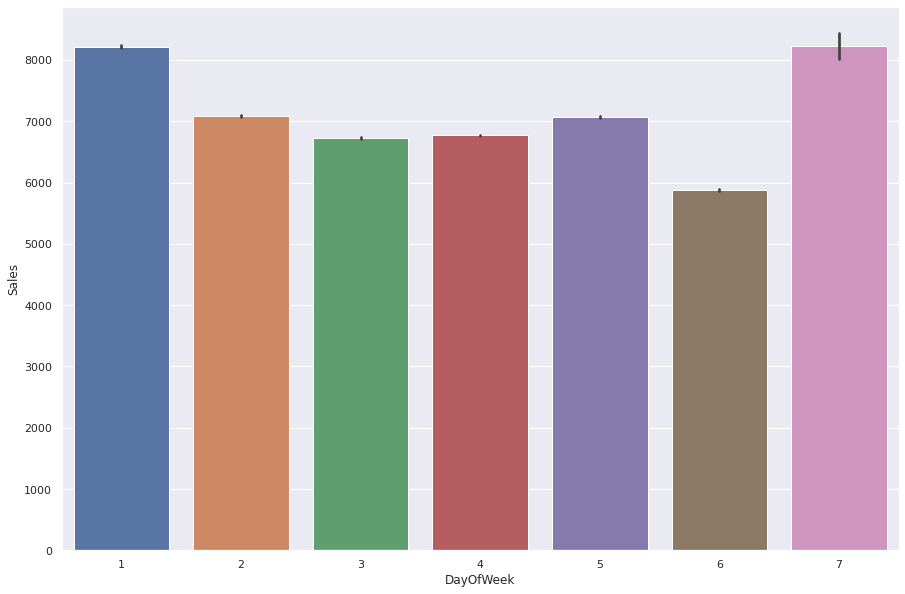

In [269]:
sns.barplot(x='DayOfWeek', y='Sales', data=final_df)

In [272]:
final_df.head(1)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31


We have columns indicating various kind of holiday's. Lets have look at them.

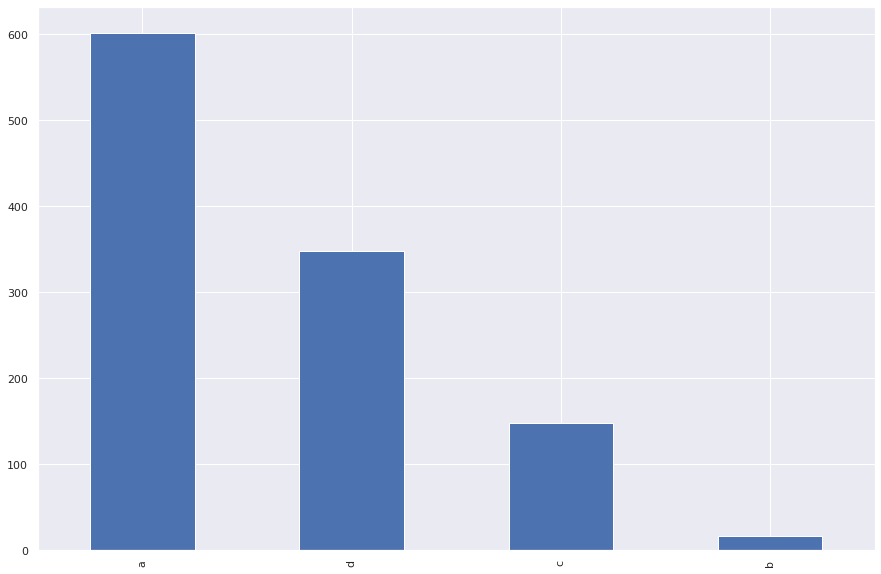

In [273]:
store_df['StoreType'].value_counts().plot(kind='bar')

In [274]:
final_df.shape

(844392, 19)

In [275]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day'],
      dtype='object')

In [276]:
final_df.head(3)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29


In [277]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 

In [278]:
final_df = pd.get_dummies(final_df, columns=['StoreType','Assortment','PromoInterval','StateHoliday'], prefix=['Str_Typ','Assortment','PrmoIntrvl','StateHoliday'])

In [279]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844392 non-null  int64  
 1   DayOfWeek                    844392 non-null  int64  
 2   Sales                        844392 non-null  int64  
 3   Customers                    844392 non-null  int64  
 4   Promo                        844392 non-null  int64  
 5   SchoolHoliday                844392 non-null  int64  
 6   CompetitionDistance          844392 non-null  float64
 7   CompetitionOpenSinceMonth    844392 non-null  float64
 8   CompetitionOpenSinceYear     844392 non-null  float64
 9   Promo2                       844392 non-null  int64  
 10  Promo2SinceWeek              844392 non-null  float64
 11  Promo2SinceYear              844392 non-null  float64
 12  Year                         844392 non-null  int64  
 13 

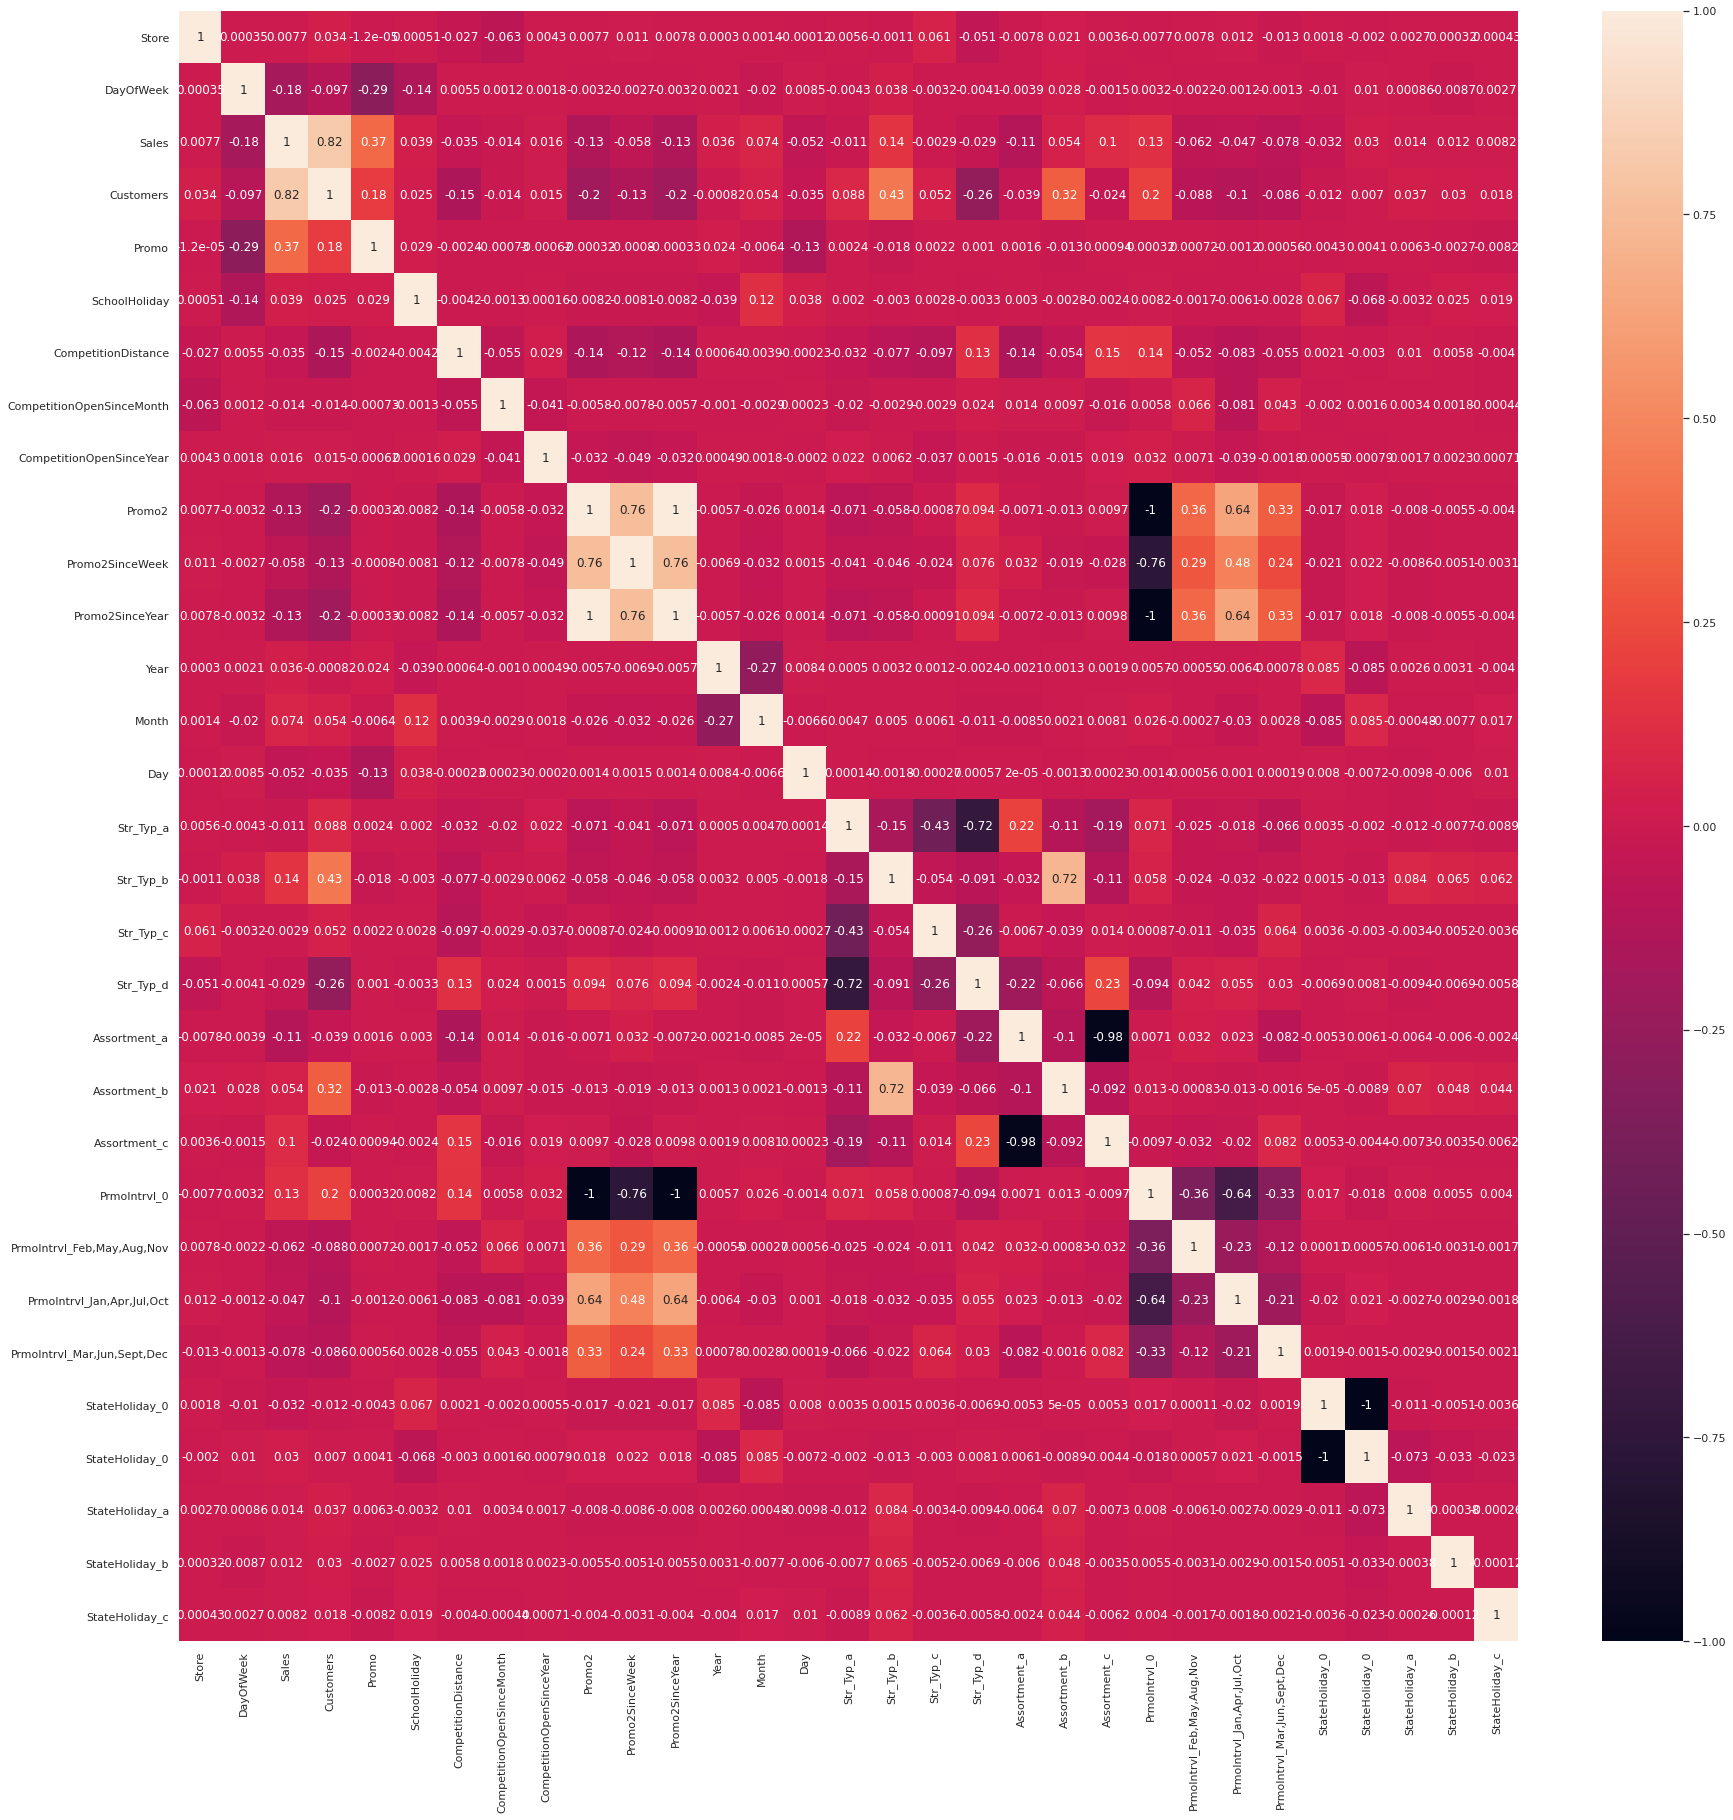

In [281]:
plt.subplots(figsize=(30,30))
sns.heatmap(final_df.corr(), annot = True)

### **Modelling**

In [282]:
Model_df = final_df.copy()

In [284]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [285]:
scaler = StandardScaler()
X = scaler.fit_transform(Model_df.drop('Sales', axis=1))
y = Model_df['Sales']

### Statistic Model

In [286]:
import statsmodels.api as sm

In [287]:
#adding constant and building model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [288]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                 1.619e+05
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        05:48:00   Log-Likelihood:            -7.2459e+06
No. Observations:              844392   AIC:                         1.449e+07
Df Residuals:                  844366   BIC:                         1.449e+07
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6955.8577      1.996   3484.756      0.000    6951.945    6959.770
x1           -35.3369      1.413    -25.014      0.000     -38.106     -32.568
x2           -70.6423      1.486    -47.552      0.000     -73.554     -67.731
x3          2950.7272      1.710   1725.191      0.000    2947.375    2954.080
x4           568.4419      1.508    376.920      0.000     565.486     571.398
x5            16.8440      1.434     11.748      0.000      14.034      19.654
x6           193.5391      1.476    131.161      0.000     190.647     196.431
x7             7.2604      1.419      5.118      0.000       4.480      10.041
x8             1.2079      1.410      0.857      0.392      -1.555       3.971
x9         -8.985e+12   3.71e+13     -0.242      0.809   -8.18e+13    6.38e+13
x10          108.5223      2.239     48.464      0.000     104.133     112.911
x11        -5.035e+04   1262.808    -39.873      0.000   -5.28e+04   -4.79e+04
x12          141.9701      1.461     97.149      0.000     139.106     144.834
x13          115.5000      1.475     78.329      0.000     112.610     118.390
x14           13.3111      1.417      9.393      0.000      10.534      16.089
x15        -4.117e+13    1.7e+14     -0.242      0.809   -3.75e+14    2.92e+14
x16        -1.111e+13   4.59e+13     -0.242      0.809   -1.01e+14    7.89e+13
x17        -2.812e+13   1.16e+14     -0.242      0.809   -2.56e+14       2e+14
x18        -3.809e+13   1.57e+14     -0.242      0.809   -3.47e+14     2.7e+14
x19         1.157e+13   4.78e+13      0.242      0.809   -8.22e+13    1.05e+14
x20         2.275e+12    9.4e+12      0.242      0.809   -1.61e+13    2.07e+13
x21         1.156e+13   4.78e+13      0.242      0.809   -8.21e+13    1.05e+14
x22         9.109e+12   3.76e+13      0.242      0.809   -6.47e+13    8.29e+13
x23         1.159e+13   4.79e+13      0.242      0.809   -8.23e+13    1.05e+14
x24         1.637e+13   6.76e+13      0.242      0.809   -1.16e+14    1.49e+14
x25         1.064e+13    4.4e+13      0.242      0.809   -7.55e+13    9.68e+13
x26         4.491e+12   1.86e+13      0.242      0.809   -3.19e+13    4.09e+13
x27         4.506e+12   1.86e+13      0.242      0.809    -3.2e+13     4.1e+13
x28         3.792e+11   1.57e+12      0.242      0.809   -2.69e+12    3.45e+12
x29         1.734e+11   7.17e+11      0.242      0.809   -1.23e+12    1.58e+12
x30         1.213e+11   5.01e+11      0.242      0.809   -8.61e+11     1.1e+12
==============================================================================
Omnibus:                   201446.166   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1901054.676
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                      10.136   Cond. No.                     6.86e+15
==

### **Lasso Regression**

In [289]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)